TASK 1
=


Activity / Task 1

Read the rr_temp_rh_24_30May21.csv. The file contains gridded data, the columns describe lat: latitude and lon: longitude for each datapoint, rr: total rainfall, tn weekly-mean daily-minimum temperature, tx: weekly-mean daily-maximum temperature and rh mean relative humidity

   1. Generate spatial map for rainfall, maximum and minimum temperature and relative humidity
   2. Save figure to pdf and png
   3.Interpret the figures
   

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader

from pathlib import Path

In [68]:
#data_path = Path('')

In [95]:
drr = np.genfromtxt("rr_temp_rh_24_30May21.csv", delimiter=",", skip_header=1)
#stn = np.genfromtxt("rr_temp_rh_24_30May21.csv", delimiter=",", skip_header=1, usecols=1, dtype='str')

lon = drr[:, 0]
lat = drr[:, 1]
rr = drr[:, 2]
tx = drr[:,3]
tn = drr[:,4]
rh = drr[:,5]


In [96]:
lon

array([11.1637506, 11.1137514, 11.1137514, ...,  4.763751 ,  4.763751 ,
        4.763751 ])

In [97]:
lat

array([-0.280419 , -0.380419 , -0.280419 , ..., -2.0804191, -2.0304191,
       -1.980419 ])

In [98]:
'rr_temp_rh_24_30May21.csv'

'rr_temp_rh_24_30May21.csv'

In [100]:
from pathlib import Path
shp_path = Path('gh_shp')

In [101]:
shp_file =  (shp_path/'gh_wgs16dregions.shp')
adm1_shapes = list(shapereader.Reader(str(shp_file)).geometries())

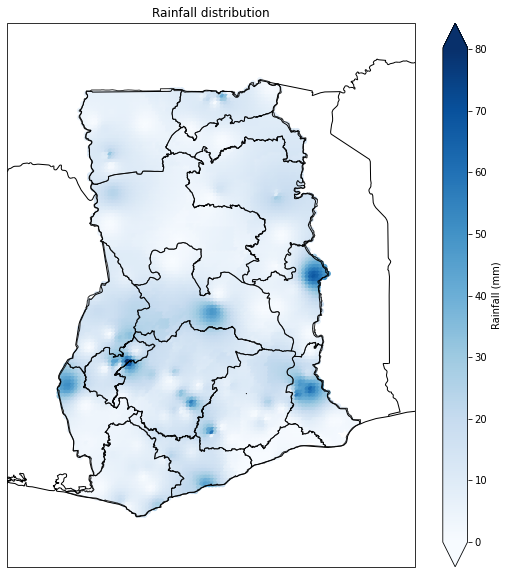

In [169]:
fig = plt.figure(figsize=(10,10))
# create axes with specific proojection
ax = plt.axes(projection=ccrs.PlateCarree())

#Alternative 
#fig, ax = plt.subplots( figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})


# set the domain lat lon extent
ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)

# and add country borders, ocean, land and lake borders from cartopy's set of features
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cf.LAKES, edgecolor='black')


ax.set(title='Rainfall distribution')
splot = ax.scatter(lat,lon,25,c=rr, cmap=cm.get_cmap('Blues'), alpha=1)
fig.colorbar(splot,label="Rainfall (mm)", orientation="vertical", extend='both')


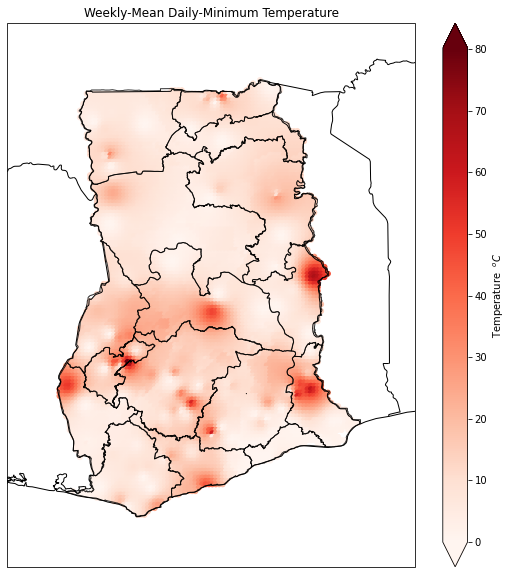

In [167]:
fig = plt.figure(figsize=(10,10))
# create axes with specific proojection
ax = plt.axes(projection=ccrs.PlateCarree())

#Alternative 
#fig, ax = plt.subplots( figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})


# set the domain lat lon extent
ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)

# and add country borders, ocean, land and lake borders from cartopy's set of features
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cf.LAKES, edgecolor='black')


ax.set(title='Weekly-Mean Daily-Minimum Temperature')
#splot = ax.scatter(lon,lat,200,c=rr, cmap=tx.jet, alpha=1)
splot = ax.scatter(lat,lon,25,c=rr, cmap=cm.get_cmap('Reds'), alpha=1)
fig.colorbar(splot,label="Temperature  $^o C$", orientation="vertical", extend='both')


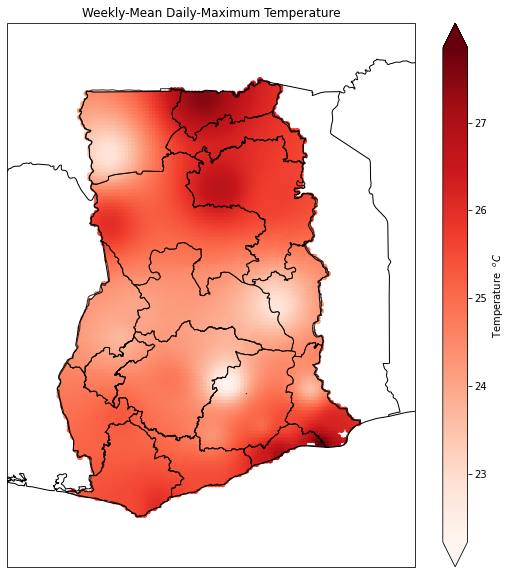

In [166]:
fig = plt.figure(figsize=(10,10))
# create axes with specific proojection
ax = plt.axes(projection=ccrs.PlateCarree())

#Alternative 
#fig, ax = plt.subplots( figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})


# set the domain lat lon extent
ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)

# and add country borders, ocean, land and lake borders from cartopy's set of features
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cf.LAKES, edgecolor='black')


ax.set(title='Weekly-Mean Daily-Maximum Temperature')
#splot = ax.scatter(lon,lat,200,c=rr, cmap=tx.jet, alpha=1)
splot = ax.scatter(lat,lon,25,c=tn, cmap=cm.get_cmap('Reds'), alpha=1)
fig.colorbar(splot,label="Temperature  $^o C$", orientation="vertical", extend='both')


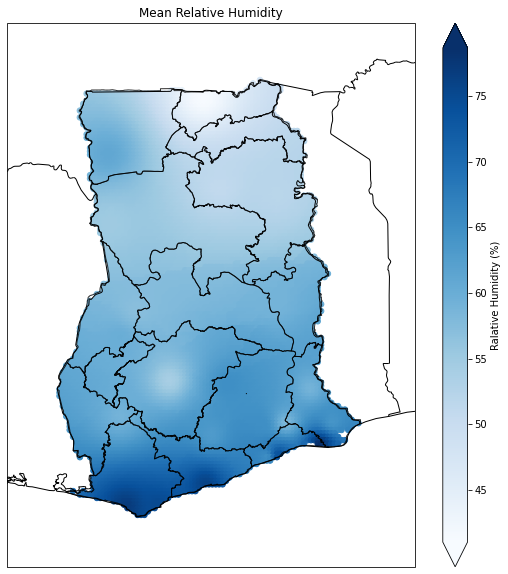

In [170]:
fig = plt.figure(figsize=(10,10))
# create axes with specific proojection
ax = plt.axes(projection=ccrs.PlateCarree())

#Alternative 
#fig, ax = plt.subplots( figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})


# set the domain lat lon extent
ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)

# and add country borders, ocean, land and lake borders from cartopy's set of features
ax.add_feature(cf.BORDERS)
ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cf.LAKES, edgecolor='black')


ax.set(title='Mean Relative Humidity')
#splot = ax.scatter(lon,lat,200,c=rr, cmap=tx.jet, alpha=1)
splot = ax.scatter(lat,lon,30,c=rh, cmap=cm.get_cmap('Blues'), alpha=1)
fig.colorbar(splot,label="Ralative Humidity (%)", orientation="vertical", extend='both')


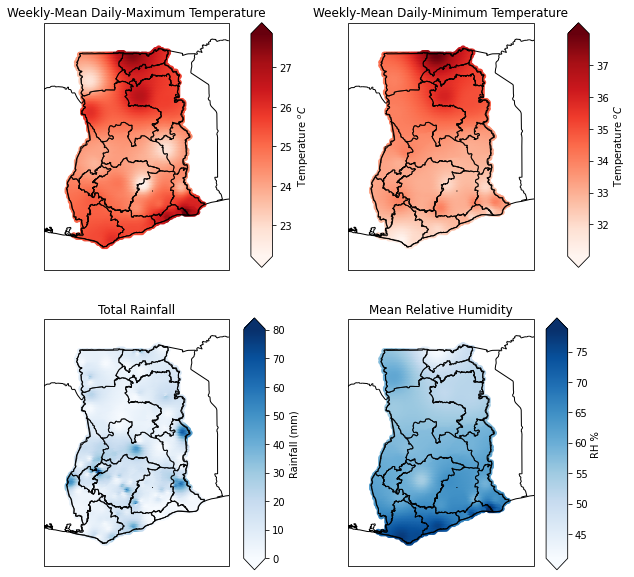

In [161]:
#fig = plt.figure(figsize=(10,10))
# create axes with specific proojection
#Alternative 
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
axes[0,0].coastlines()
axes[0,1].coastlines()
axes[1,0].coastlines()
axes[1,1].coastlines()




# set the domain lat lon extent
axes[0,0].set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
axes[0,1].set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
axes[1,0].set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
axes[1,1].set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
axes[0,0].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
axes[0,1].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
axes[1,0].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)
axes[1,1].add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.8)



# and add country borders, ocean, land and lake borders from cartopy's set of features
axes[0,0].add_feature(cf.BORDERS)
axes[0,1].add_feature(cf.BORDERS)
axes[1,0].add_feature(cf.BORDERS)
axes[1,1].add_feature(cf.BORDERS)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cf.LAKES, edgecolor='black')


axes[0,0].set(title='Weekly-Mean Daily-Maximum Temperature')
axes[0,1].set(title='Weekly-Mean Daily-Minimum Temperature')
axes[1,0].set(title='Total Rainfall')
axes[1,1].set(title='Mean Relative Humidity')


#splot = ax.scatter(lon,lat,200,c=rr, cmap=tx.jet, alpha=1)
splot1 = axes[0,0].scatter(lat,lon,25,c=tn, cmap=cm.get_cmap('Reds'), alpha=1)
#fig.colorbar(splot,label="Rainfall", orientation="vertical", extend='both')

splot2 = axes[0,1].scatter(lat,lon,25,c=tx, cmap=cm.get_cmap('Reds'), alpha=1)
#fig.colorbar(splot,label="Rainfall", orientation="vertical", extend='both')

splot3 = axes[1,0].scatter(lat,lon,25,c=rr, cmap=cm.get_cmap('Blues'), alpha=1)
#fig.colorbar(splot,label="Rainfall", orientation="vertical", extend='both')

splot4 = axes[1,1].scatter(lat,lon,25,c=rh, cmap=cm.get_cmap('Blues'), alpha=1)
#fig.colorbar(splot,label="RH %", orientation="vertical", extend='both')

#######################################################################
cb1= fig.add_axes([0.46, 0.54, 0.03, 0.34])
cbar1 = fig.colorbar(splot1, cax=cb1, label='Temperature $^o C$', extend='both')



cb2 = fig.add_axes([0.90, 0.54, 0.03, 0.34])
cbar2 = fig.colorbar(splot2, cax=cb2, label='Temperature $^o C$', extend='both')

cb3 =fig.add_axes([0.45, 0.12, 0.03, 0.35])
cbar = fig.colorbar(splot3, cax=cb3, label='Rainfall (mm)', extend='both')

cb4 =fig.add_axes([0.87, 0.12, 0.03, 0.35])
cbar = fig.colorbar(splot4, cax=cb4, label='RH %', extend='both')



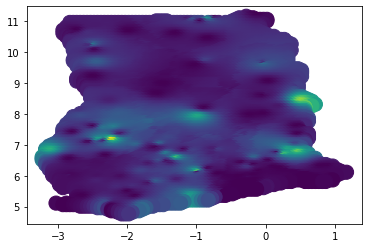

In [80]:
plt.scatter(lat,lon,200,c=rr)